In [46]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load Data

In [47]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [48]:
train_labels.shape

(60000,)

In [49]:
test_labels.shape

(10000,)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


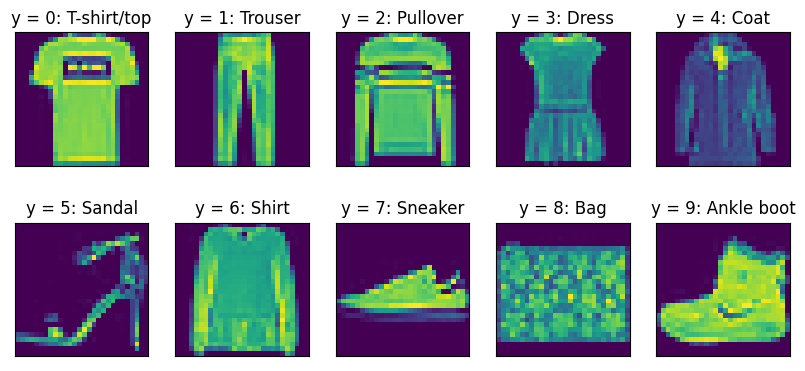

In [50]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", train_images.shape, "y_train shape:", train_labels.shape)

# Print the number of training and test datasets
print(train_images.shape[0], 'train set')
print(test_images.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


figure = plt.figure(figsize=(10, 7))
for label_index in range(10):
    ax = figure.add_subplot(3, 5, label_index + 1, xticks=[], yticks=[])
    ax.imshow(train_images[train_labels == label_index][0])
    ax.set_title("y = " + str(label_index) + ": " +(fashion_mnist_labels[label_index]))
    

# Preprocessing

In [51]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [52]:
train_labels.shape

(60000, 10)

In [53]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model

In [54]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [55]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
callback  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [57]:
model.fit(train_images,
        train_labels,
        batch_size=64,
        epochs=10,
        validation_split=0.2,
        callbacks=[callback])

Epoch 1/10
750/750 [==============================] - 32s 41ms/step - loss: 1.6370 - accuracy: 0.6495 - val_loss: 0.5366 - val_accuracy: 0.7941
Epoch 2/10
750/750 [==============================] - 30s 40ms/step - loss: 0.6270 - accuracy: 0.7590 - val_loss: 0.4401 - val_accuracy: 0.8368
Epoch 3/10
750/750 [==============================] - 30s 40ms/step - loss: 0.5415 - accuracy: 0.7945 - val_loss: 0.4095 - val_accuracy: 0.8481
Epoch 4/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4914 - accuracy: 0.8157 - val_loss: 0.3590 - val_accuracy: 0.8676
Epoch 5/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4503 - accuracy: 0.8327 - val_loss: 0.3432 - val_accuracy: 0.8756
Epoch 6/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4279 - accuracy: 0.8419 - val_loss: 0.3203 - val_accuracy: 0.8816
Epoch 7/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4111 - accuracy: 0.8500 - val_loss: 0.3191 - val_accuracy:

# Evaluation

In [58]:
# Evaluate the model on test set
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8907999992370605


In [59]:
y_hat = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [60]:
y_hat.shape

(10000, 10)

In [61]:
predict_index = np.argmax(y_hat, axis=1)

In [62]:
predict_index

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [63]:
test_labels = np.argmax(test_labels, axis=1)

In [64]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [65]:
print(classification_report(test_labels, predict_index))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.83      0.82      1000
           3       0.88      0.91      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.99      0.98      0.98      1000
           6       0.71      0.67      0.69      1000
           7       0.97      0.94      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



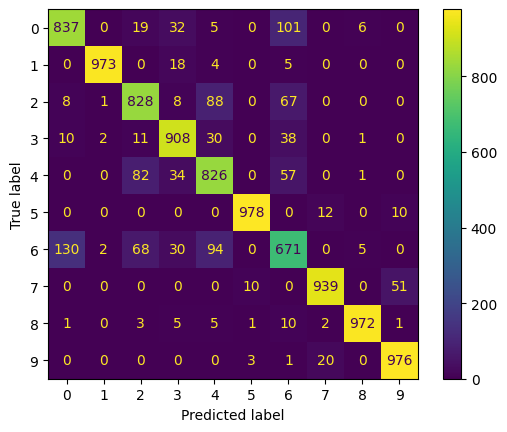

In [66]:
cm = confusion_matrix(test_labels, predict_index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()
plt.show()

In [67]:
dict_print = {}
for i in range(10):
    dict_print[i] = []

for i,bol in enumerate(np.equal(test_labels, predict_index)):
    if (not bol):
        if len(dict_print[test_labels[i]]) < 2 :
            dict_print[test_labels[i]].append(i)

In [68]:
dict_print

{0: [170, 332],
 1: [701, 787],
 2: [48, 49],
 3: [29, 42],
 4: [6, 25],
 5: [722, 902],
 6: [40, 89],
 7: [12, 331],
 8: [529, 635],
 9: [23, 68]}

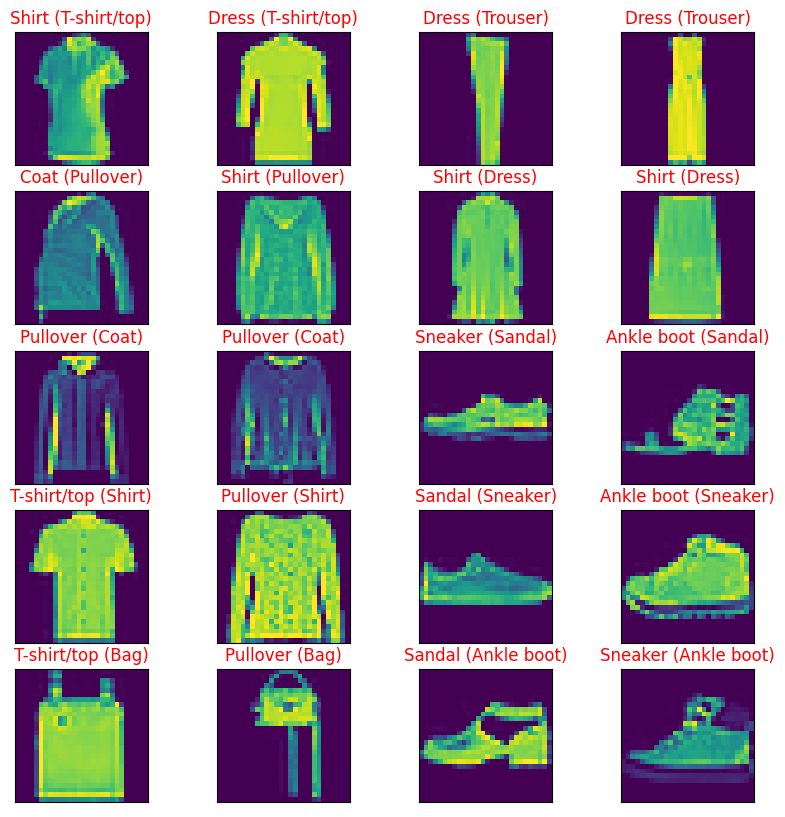

In [69]:
figure = plt.figure(figsize=(10, 10))
i = 0
for clas in dict_print:
    for ind in dict_print[clas]:
        ax = figure.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
        i += 1
        ax.imshow(test_images[ind])
        ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index[ind]], 
                                    fashion_mnist_labels[test_labels[ind]]),
                                    color=("green" if predict_index[ind] == test_labels[ind] else "red"))